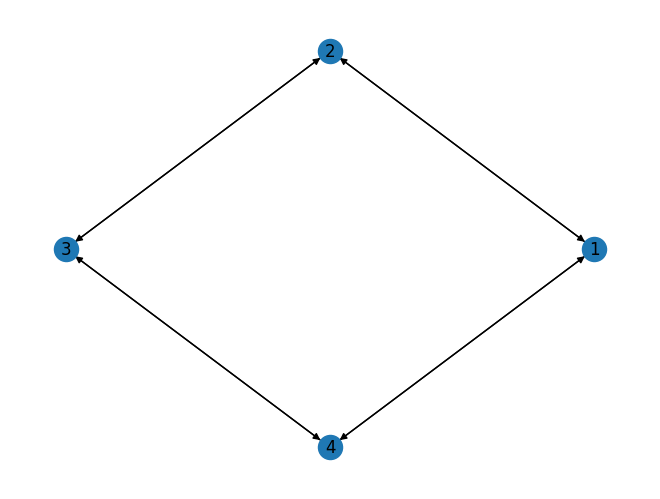

In [6]:
# let's talk about graph theory:

import networkx as nx
import numpy as np

G = nx.DiGraph()
nx.add_cycle(G, np.arange(1,5))
nx.add_cycle(G, np.arange(4,0,-1))

nx.draw_circular(G, with_labels=True)

In [9]:
# retrive the adjacency matrix from G
W = nx.adjacency_matrix(G).todense()
W

array([[0, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 0]])